In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [69]:
history_df = pd.read_json('data/streaming_history.json')
# print(history_df.head())

In [70]:
history_df.to_csv('data/streaming_history.csv', index=False)
print(history_df.shape)

(13509, 21)


In [71]:
history_df.info()
# We can probably drop episode name, episode show name and episode uri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13509 entries, 0 to 13508
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 13509 non-null  object 
 1   username                           13509 non-null  object 
 2   platform                           13509 non-null  object 
 3   ms_played                          13509 non-null  int64  
 4   conn_country                       13509 non-null  object 
 5   ip_addr_decrypted                  13509 non-null  object 
 6   user_agent_decrypted               11607 non-null  object 
 7   master_metadata_track_name         13402 non-null  object 
 8   master_metadata_album_artist_name  13402 non-null  object 
 9   master_metadata_album_album_name   13402 non-null  object 
 10  spotify_track_uri                  13402 non-null  object 
 11  episode_name                       20 non-null     obj

In [72]:
spotify_stream_df = history_df[[
    'ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name']].copy()
# spotify_stream_df.tail(3)
spotify_stream_df['ts'] = pd.to_datetime(spotify_stream_df['ts']) # convert to datetime

spotify_stream_df.sample(10)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
6568,2023-12-20 02:17:27+00:00,156578,Tyler Herro,Jack Harlow
7610,2024-01-19 22:13:59+00:00,7480,pick up the phone,Young Thug
4925,2023-11-07 02:22:28+00:00,1720,Yessirskiii,Lil Uzi Vert
7411,2024-01-12 06:39:38+00:00,1320,all of me,21 Savage
685,2023-04-30 21:47:26+00:00,10940,Dear Mama,2Pac
13173,2024-06-11 20:40:28+00:00,204606,Solo,Future
7326,2024-01-09 21:41:20+00:00,213593,MIDDLE CHILD,J. Cole
415,2023-04-06 05:42:26+00:00,117615,Boy's a liar Pt. 2,PinkPantheress
9396,2024-03-16 21:00:07+00:00,205760,Sum 2 Prove,Lil Baby
11982,2024-05-28 05:09:13+00:00,194614,Exchange,Bryson Tiller


In [73]:
# Unique artists and tracks:
print("Unique Artists: ", len(spotify_stream_df["master_metadata_album_artist_name"].unique()))
print("Unique Tracks: ", len(spotify_stream_df["master_metadata_track_name"].unique()))


Unique Artists:  780
Unique Tracks:  2901


In [74]:
spotify_stream_df['play_time'] = pd.to_datetime(spotify_stream_df['ts'])
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df['play_time']).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df['play_time']).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df['play_time']).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df['play_time']).weekday
spotify_stream_df['hour'] = pd.DatetimeIndex(spotify_stream_df['play_time']).hour
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df['play_time']).time
spotify_stream_df['day-name'] = spotify_stream_df['play_time'].apply(lambda x: x.day_name())
spotify_stream_df['count'] = 1

In [75]:
spotify_stream_df['time_played'] = pd.to_timedelta(spotify_stream_df['ms_played'], unit='ms')

def hours_played(time):
    return time.seconds / 3600
def minutes_played(time):
    return time.seconds / 60 % 60


spotify_stream_df["time_played_hours"] = spotify_stream_df["time_played"].apply(
    hours_played).round(3)
spotify_stream_df["time_played_minutes"] = spotify_stream_df["time_played"].apply(
    minutes_played).round(3)

In [76]:
spotify_stream_df.tail()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,play_time,year,month,day,weekday,hour,time,day-name,count,time_played,time_played_hours,time_played_minutes
13504,2024-06-12 22:14:27+00:00,5189,That Fiya,Lil Uzi Vert,2024-06-12 22:14:27+00:00,2024,6,12,2,22,22:14:27,Wednesday,1,0 days 00:00:05.189000,0.001,0.083
13505,2024-06-12 22:14:30+00:00,3157,5!RE,Homixide Gang,2024-06-12 22:14:30+00:00,2024,6,12,2,22,22:14:30,Wednesday,1,0 days 00:00:03.157000,0.001,0.050
13506,2024-06-12 22:16:20+00:00,110926,Go,Ken Carson,2024-06-12 22:16:20+00:00,2024,6,12,2,22,22:16:20,Wednesday,1,0 days 00:01:50.926000,0.031,1.833
13507,2024-06-12 22:19:33+00:00,192213,"Like This (feat. Lil Uzi Vert, Destroy Lonely)",Ken Carson,2024-06-12 22:19:33+00:00,2024,6,12,2,22,22:19:33,Wednesday,1,0 days 00:03:12.213000,0.053,3.200
13508,2024-06-12 23:42:58+00:00,113030,Fighting My Demons,Ken Carson,2024-06-12 23:42:58+00:00,2024,6,12,2,23,23:42:58,Wednesday,1,0 days 00:01:53.030000,0.031,1.883


In [77]:
# no longer necessary
spotify_stream_df.drop(columns=['ts', 'time_played', 'ms_played'])
# All data cleaning is complete
spotify_stream_df.describe()

,ms_played,year,month,day,weekday,hour,count,time_played,time_played_hours,time_played_minutes
count,1.350900e+04,13509.000000,13509.000000,13509.000000,13509.000000,13509.000000,13509.0,13509,13509.000000,13509.000000
mean,9.868708e+04,2023.445111,6.052558,15.119846,2.994892,11.510252,1.0,0 days 00:01:38.687077429,0.027267,1.636687
std,9.559666e+04,0.619885,3.308833,8.660908,2.018581,8.555303,0.0,0 days 00:01:35.596663713,0.026561,1.593050
min,0.000000e+00,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0 days 00:00:00,0.000000,0.000000
25%,5.320000e+03,2023.000000,4.000000,8.000000,1.000000,3.000000,1.0,0 days 00:00:05.320000,0.001000,0.083000
50%,8.953500e+04,2023.000000,6.000000,14.000000,3.000000,14.000000,1.0,0 days 00:01:29.535000,0.025000,1.483000
75%,1.708580e+05,2024.000000,9.000000,23.000000,5.000000,20.000000,1.0,0 days 00:02:50.858000,0.047000,2.833000
max,1.648635e+06,2024.000000,12.000000,31.000000,6.000000,23.000000,1.0,0 days 00:27:28.635000,0.458000,27.467000


In [82]:
sns.set_style('whitegrid')
# print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')

matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [84]:
# calculating average songs per artist
total_artists = spotify_stream_df['master_metadata_album_artist_name'].count()
unique_artists = spotify_stream_df['master_metadata_album_artist_name'].nunique()

average_songs_per_artist = total_artists / unique_artists
print(average_songs_per_artist)

17.20410783055199


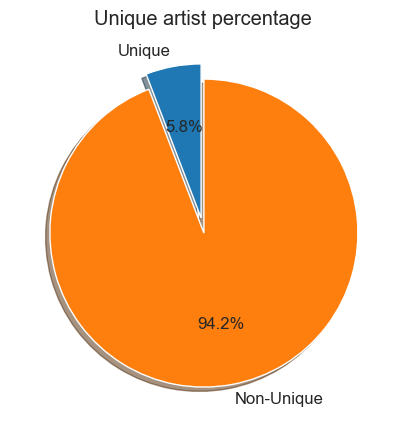

In [88]:
unique_artist_list = np.array([unique_artists, total_artists - unique_artists])
unique_artist_labels = ['Unique', 'Non-Unique']

fig, ax = plt.subplots()
ax.pie(unique_artist_list, labels=unique_artist_labels, autopct='%1.1f%%', startangle=90, shadow=True, explode = [0.05, 0.05])
plt.title("Unique artist percentage")
plt.show()